### Implementacja bibliotek

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Implementacja generatora procesu Poissona za pomocą czasów oczekiwania

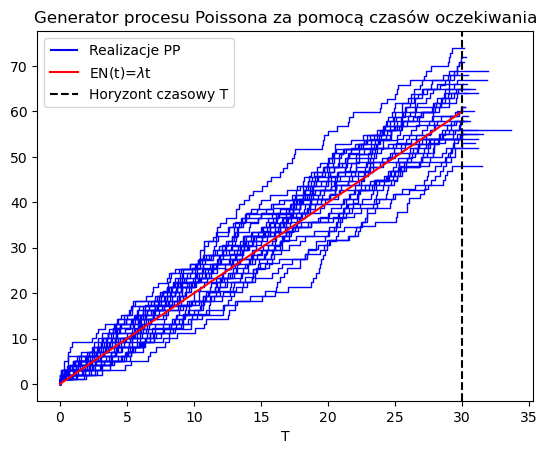

In [7]:
def Pois_Pro_T(l, T, N):
    S_I = [[0] for i in range(N)]
    for i in range(N):
        t = 0
        while t <= T:
            t -= 1/l*np.log(np.random.random())
            S_I[i].append(t)
    return S_I


l = 2
T = 30
N = 30

S_I = Pois_Pro_T(l,T,N)
for i in range(N):
    plt.step(S_I[i], np.linspace(0,len(S_I[i]),len(S_I[i])), color='b', linewidth=1)
plt.hlines(0,0.0,0.001,label='Realizacje PP', color='b')
x = np.linspace(0,T,T)
plt.plot(x,l*x, color='r', label='EN(t)=$\lambda$t')
plt.axvline(x = T, label='Horyzont czasowy T', linestyle='dashed', color='k')
plt.legend()
plt.title('Generator procesu Poissona za pomocą czasów oczekiwania')
plt.xlabel('T')
plt.show()

### Implementacja generatora procesu Poissona za pomocą generowania jego przyrostów

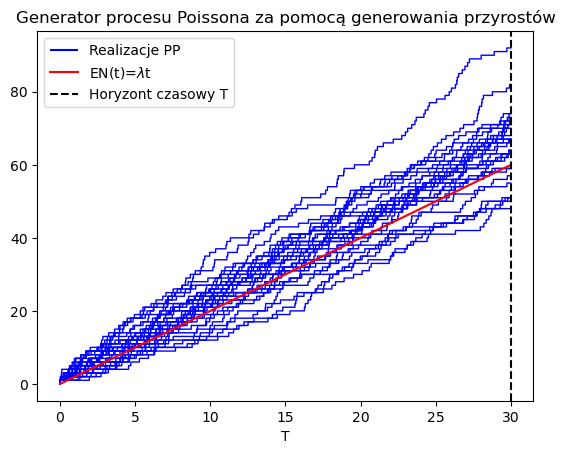

In [11]:
def Pois_Pro_P(l,T,n,N):
    h = T/n
    S_I = [[[T/n*i] for i in range(n+1)] for a in range(N)]
    N_T = [[0] for i in range(N)]
    for i in range(N):
        I = 1
        for a in range(n):
            if np.random.uniform() <= l*h:
                N_T[i].append(I)
                I+=1
            else:
                N_T[i].append(I)
    return S_I, N_T

l = 2
T = 30
n = 1000
N = 30


data = Pois_Pro_P(l, T, n, N)

S_I = data[0]
N_T = data[1]

for i in range(len(S_I)):
    plt.step(S_I[i], N_T[i], color='b', linewidth=1)
plt.hlines(0,0.0,0.001,label='Realizacje PP', color='b')
x = np.linspace(0,T,T)
plt.plot(x,l*x, color='r', label='EN(t)=$\lambda$t')
plt.axvline(x = T, label='Horyzont czasowy T', linestyle='dashed', color='k')
plt.legend()
plt.title('Generator procesu Poissona za pomocą generowania przyrostów')
plt.xlabel('T')
plt.show()


### Implementacja generatora procesu Poissona za pomocą wektora momentów skoków

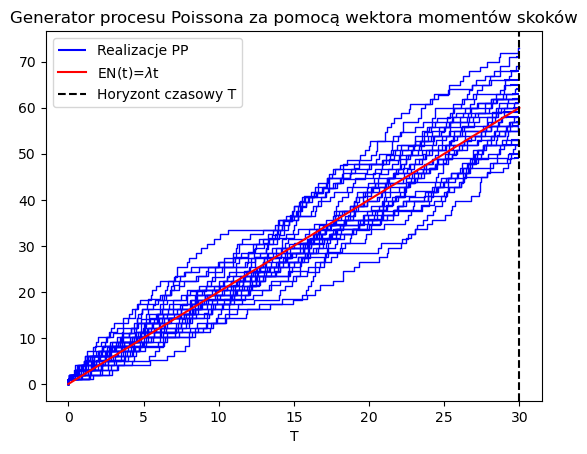

In [12]:
def Pois_Pro_V(l,T,N):
    S_I = [[0] for i in range(N)]
    for i in range(N):
        n = np.random.poisson(l*T)
        if n != 0:
            for a in range(n):
                S_I[i].append(np.random.uniform(0,T))
            S_I[i].sort()
    return S_I

l = 2
T = 30
N = 30

S_I = Pois_Pro_V(l,T,N)
for i in range(N):
    plt.step(S_I[i], np.linspace(0,len(S_I[i]),len(S_I[i])), color='b', linewidth=1)
    plt.hlines(y=len(S_I[i]),xmin=S_I[i][-1],xmax=T,color='b')
plt.hlines(0,0.0,0.001,label='Realizacje PP', color='b')
x = np.linspace(0,T,T)
plt.plot(x,l*x, color='r', label='EN(t)=$\lambda$t')
plt.axvline(x = T, label='Horyzont czasowy T', linestyle='dashed', color='k')
plt.legend()
plt.title('Generator procesu Poissona za pomocą wektora momentów skoków')
plt.xlabel('T')
plt.show()